In [22]:
""" github 연동 """
# !git clone https://github.com/ku-sungsukim/2025-LGElec-Day2.git ### colab 사용시

' github 연동 '

## **0. 필요 패키지 불러오기**

In [23]:
""" 데이터처리 관련 패키지 """
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


""" 기계학습 모델 구축 및 평가 패키지 """
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score


""" 데이터 시각화 패키지 """
import matplotlib.pyplot as plt


""" 경고 숨기기 """
import warnings
warnings.filterwarnings(action='ignore')

## **1. 데이터 핸들링 및 탐색적 데이터 분석**
 - 분석데이터: Parkinson 질병 예측
 
   This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

   The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

   Further details are contained in the following reference -- if you use this dataset, please cite:
   Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

#### **반응변수**
 - status (0: 정상 / 1: 환자)

#### **1-1. 데이터 불러오기 및 개요 파악**

In [24]:
""" 데이터 불러오기 """
data = pd.read_csv('data/Parkinson.csv') ### 로컬 사용시
# data = pd.read_csv('/content/2025-LGElec-Day2/data/Parkinson.csv') ### colab 사용시

In [25]:
""" 데이터 상위 7개 Row 확인 """
data.head(7)

,name,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,1,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,phon_R01_S01_2,1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,phon_R01_S01_3,1,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,phon_R01_S01_4,1,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,phon_R01_S01_5,1,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
5,phon_R01_S01_6,1,-0.815735,-0.722609,-0.058458,0.715418,1.037674,0.447135,1.473037,0.445927,...,0.493901,0.752360,-0.313213,-0.115072,-0.800305,1.938081,1.325656,0.872692,-0.508795,1.682354
6,phon_R01_S02_1,1,-0.822638,-0.655962,-0.034661,-0.597735,-0.401899,-0.593351,-0.518319,-0.592304,...,-0.625412,-0.777548,-0.465763,0.679600,0.940483,0.833662,0.046050,0.374697,-1.380353,0.057898


In [26]:
""" 데이터 크기 확인 """
data.shape

(195, 24)

In [27]:
""" 데이터 전체 변수명 확인 """
data.columns

Index(['name', 'status', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

#### **1-2. 탐색적 데이터 분석**

In [28]:
""" 데이터 결측치 여부 및 변수 타입 확인 """
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   status            195 non-null    int64  
 2   MDVP:Fo(Hz)       195 non-null    float64
 3   MDVP:Fhi(Hz)      195 non-null    float64
 4   MDVP:Flo(Hz)      195 non-null    float64
 5   MDVP:Jitter(%)    195 non-null    float64
 6   MDVP:Jitter(Abs)  195 non-null    float64
 7   MDVP:RAP          195 non-null    float64
 8   MDVP:PPQ          195 non-null    float64
 9   Jitter:DDP        195 non-null    float64
 10  MDVP:Shimmer      195 non-null    float64
 11  MDVP:Shimmer(dB)  195 non-null    float64
 12  Shimmer:APQ3      195 non-null    float64
 13  Shimmer:APQ5      195 non-null    float64
 14  MDVP:APQ          195 non-null    float64
 15  Shimmer:DDA       195 non-null    float64
 16  NHR               195 non-null    float64
 1

In [29]:
""" 분석에 불필요한 변수 삭제"""

"""
1. 불필요변수: 'name'
"""

data = data.drop('name', axis=1)
data.shape

(195, 23)

In [30]:
""" 각 변수별 통계량 확인 """
data.describe()

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,0.753846,-5.128199e-12,-2.368476e-16,7.743094e-17,1.821904e-17,1.821904e-17,-1.275333e-16,9.109522e-17,7.287618e-17,2.584827e-16,...,-1.025641e-09,-1.625480e-16,1.093143e-16,8.927332e-16,5.128205e-08,-5.122467e-13,1.193347e-15,-5.140503e-14,-5.921189e-16,1.821904e-17
std,0.431878,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,0.000000,-1.596162e+00,-1.040581e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.180440e-01,-8.873331e-01,-1.072340e+00,...,-9.993055e-01,-1.097815e+00,-6.002051e-01,-3.045707e+00,-2.333888e+00,-2.605676e+00,-2.097268e+00,-2.647338e+00,-2.510472e+00,-1.802384e+00
25%,1.000000,-8.879183e-01,-6.820590e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.764609e-01,-5.557071e-01,-7.020291e-01,...,-6.508513e-01,-7.326182e-01,-4.693595e-01,-6.089102e-01,-7.449206e-01,-7.852617e-01,-7.041503e-01,-6.269844e-01,-7.404100e-01,-7.687420e-01
50%,1.000000,-1.317379e-01,-2.331437e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.748504e-01,-2.736279e-01,-3.583019e-01,...,-3.444009e-01,-2.841460e-01,-3.271036e-01,4.508553e-02,-2.490033e-02,7.527941e-02,-3.353960e-02,-9.166005e-02,-5.315145e-02,-1.390580e-01
75%,1.000000,6.913210e-01,2.969710e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.848331e-01,1.784870e-01,4.346898e-01,...,3.146448e-01,4.543110e-01,1.966835e-02,7.225273e-01,8.587132e-01,7.932500e-01,5.869042e-01,6.337615e-01,6.668912e-01,5.165137e-01
max,1.000000,2.564598e+00,4.327631e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.862742e+00,6.126923e+00,4.751617e+00,...,6.726438e+00,4.029746e+00,7.192738e+00,2.528321e+00,1.800007e+00,1.942048e+00,2.989093e+00,2.692370e+00,3.376831e+00,3.569059e+00


In [31]:
""" Y Class 별 데이터 개수 확인 """
class0 = data[data['status'] == 0]
class1 = data[data['status'] == 1]

print(f'정상: {class0.shape}')
print(f'환자: {class1.shape}')

정상: (48, 23)
환자: (147, 23)


#### **1-2. 탐색적 데이터 분석**

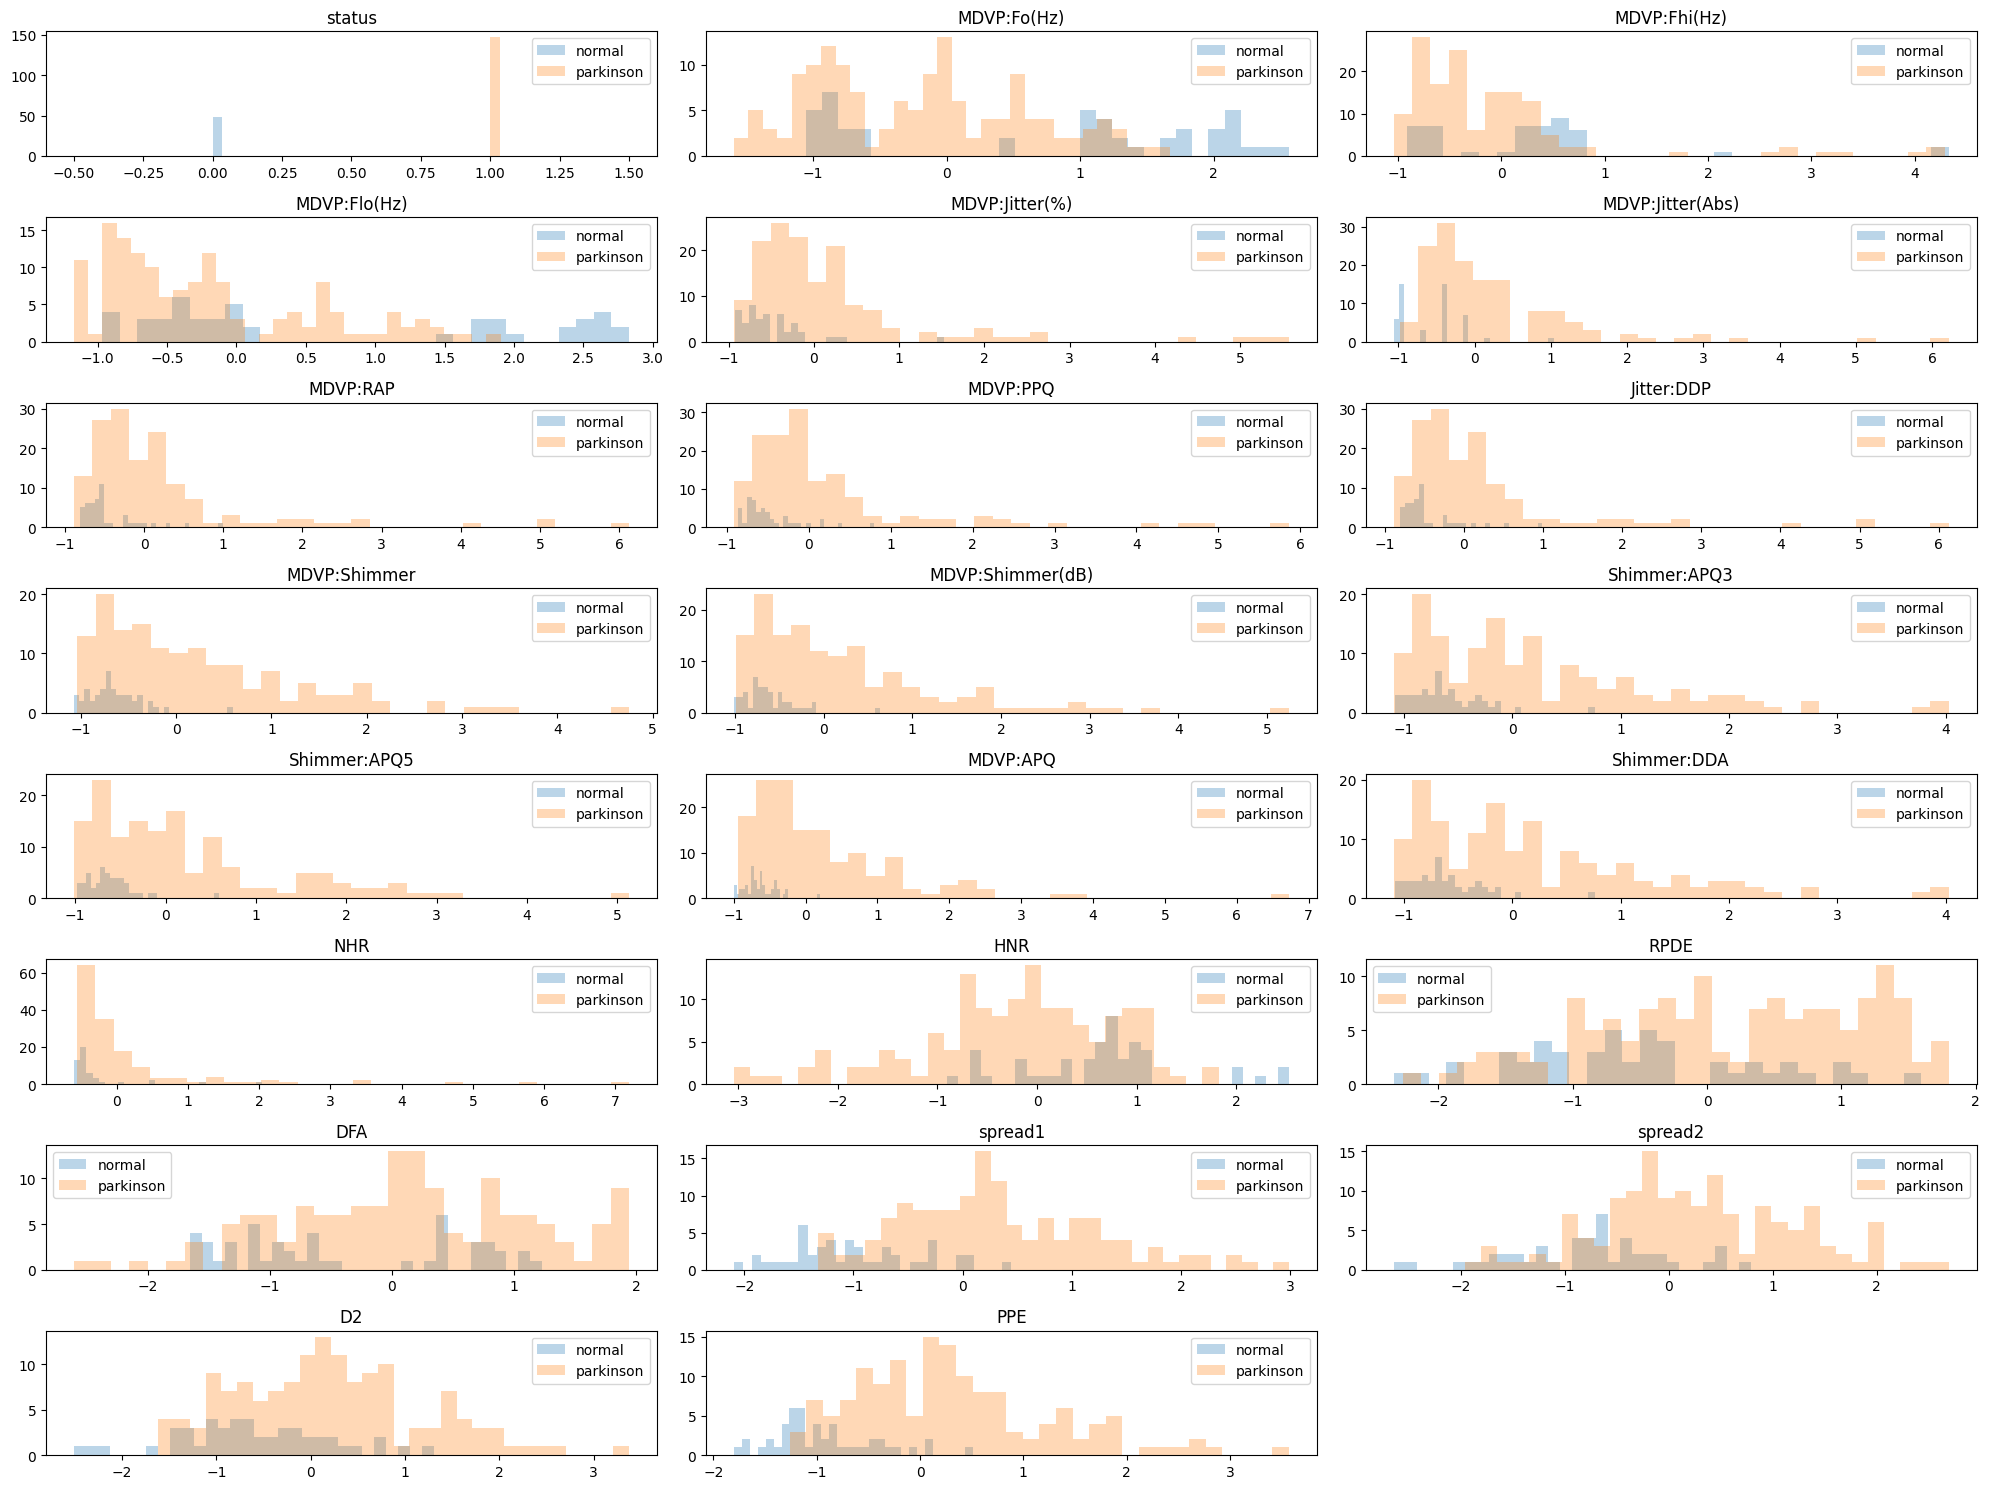

In [ ]:
""" 변수 별 Class 분포 확인 """

"""
1. Figure 크기는 20x15로 설정
2. 전체 23개 그래프를 8x3 그리드에 표현
3. class=0과 class1를 함께 표현하며, 전체 구간을 30으로 나누며, 투명도는 0.3으로 설정
4. 범례는 normal 및 parkinson으로 표현
5. title은 각 column명으로 설정
"""

plt.figure(figsize=[20, 15])

for i, colname in enumerate(data.columns):
    plt.subplot(8, 3, i+1) 
    plt.hist(class0[colname],bins=30, alpha=0.3)
    plt.hist(class1[colname], bins=30 ,alpha=0.3)
    plt.title(colname) 
    plt.legend(['normal', 'parkinson']) 
    plt.tight_layout()

## **2. 데이터 분할 및 스케일링**

In [33]:
""" X변수와 Y변수 나누기 """

"""
1. X변수: status를 제외한 모든 변수
2. Y변수: status
"""

X = data.drop('status', axis=1)
y = data[['status']]

X.shape, y.shape

((195, 22), (195, 1))

In [34]:
""" 학습데이터와 평가데이터 분할 """

"""
1. 분할비율: 학습데이터(70%) / 평가데이터(30%)
"""

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=216)

print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape}')

X_train: (136, 22) | X_test: (59, 22) | y_train: (136, 1) | y_test: (59, 1)


In [35]:
""" X변수들을 각 변수 단위로 표준 정규화 """

"""
1. StandardScaler를 활용할 것
2. 학습데이터 및 평가데이터 모두 정규화
 - 반드시 학습데이터에서 활용한 파라미터로 평가데이터를 정규화할 것
"""

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

X_train = pd.DataFrame(X_train, columns = X.columns) 
X_test = pd.DataFrame(X_test, columns = X.columns)

X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1.045996,0.157164,1.685978,-0.791240,-0.866855,-0.688295,-0.761780,-0.689361,-0.898489,-0.859683,...,-0.812399,-0.919919,-0.552210,2.166665,-1.462298,0.541993,-1.792825,-0.622009,0.126167,-1.543970
1,1.071377,0.523311,0.995598,-0.685240,-0.866855,-0.703695,-0.700814,-0.702707,-0.153048,-0.259091,...,-0.232644,-0.076176,-0.352670,-0.251681,-0.014651,-1.524869,-0.362910,-0.028506,0.454968,-0.467886
2,1.077511,0.406253,-0.710344,-0.465669,-0.604405,-0.429573,-0.436626,-0.428605,-0.490731,-0.497342,...,-0.508981,-0.416456,-0.142870,-0.687780,0.350237,-1.483984,-0.159517,-0.113989,0.186296,-0.159755
3,-0.417933,-0.216606,-0.922142,-0.427812,-0.341956,-0.503494,-0.446788,-0.502520,-0.670997,-0.626395,...,-0.348153,-0.785198,-0.354417,0.669312,-0.650611,-0.873059,0.047758,0.375980,0.309886,-0.045403
4,-0.989630,0.879692,-0.306536,0.475078,0.970290,0.137152,0.609962,0.138078,0.132840,0.346464,...,0.050879,0.236275,-0.332149,-0.037242,0.462409,1.915736,0.961376,-0.015632,-1.436281,1.181707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.723297,0.059149,1.189251,-0.567883,-0.604405,-0.494254,-0.534850,-0.494307,-0.660334,-0.641286,...,-0.586355,-0.689060,-0.523829,0.980249,-0.965908,0.828798,-0.253372,0.516054,-0.037651,-0.458260
132,2.068920,0.890349,2.637319,-0.312348,-0.604405,-0.152371,-0.348564,-0.152450,-0.541510,-0.492379,...,-0.647702,-0.447132,-0.352670,-0.066126,0.224677,-1.222939,-1.381515,-0.611359,-0.767131,-1.137306
133,-1.016234,-0.962291,-0.476548,-0.505419,-0.341956,-0.485014,-0.463723,-0.484041,-0.757322,-0.730630,...,-0.706838,-0.765907,-0.477328,1.032108,-1.122173,0.982918,-0.198483,-0.363504,-1.383340,-0.258288
134,-0.347570,0.239112,-0.777609,-0.467562,-0.341956,-0.528134,-0.463723,-0.528185,-0.741581,-0.765375,...,-0.590224,-0.743454,-0.398516,0.731894,0.631985,-1.012680,0.326003,-0.151269,-0.487054,0.320078


## **3. 모델링**

#### **3-1. 모델 학습 (파라미터 도출)**

In [36]:
""" 모델 학습 (파라미터 산출) """

"""
1. sklearn을 활용할 것
"""

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### **3-2. 모델 결과해석**
 - 로지스틱 회귀모형의 β0, β1, β2 ...를 활용한 결과 해석

In [37]:
""" 산출된 β0값 확인 """
print(model.intercept_)

[2.45520399]


In [38]:
""" 산출된 coefficient값(β1, β2, β3...) 확인 """
print(model.coef_)

[[-0.44715064 -0.34614462 -0.17243166 -0.42264025 -0.15647875  0.20808456
  -0.19028238  0.20602115  0.14023911  0.11015223 -0.19851335  0.26287849
   0.52318586 -0.19851417 -0.3221812   0.03642014 -0.26429285  0.10588305
   1.0545859   0.70639174  0.82441354  0.83221433]]


In [39]:
""" β값 분석 """

"""
1. beta값을 활용하여 개별 변수의 risky 또는 protective 여부 판별
 - 판별 기준은 odds값을 활용
 - 데이터프레임으로 보기 쉽게 정리할 것
 - beta와 odds의 반올림은 무조건 소수 셋째자리에서 할 것
"""

beta = np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(3) 
odds = np.exp(beta).round(3)
interpret = np.where(beta > 0, 'risky', 'protective') 
column_name = ["const"] + X.columns.tolist()

beta_analysis = pd.DataFrame(np.c_[beta, odds, interpret],
                             index=column_name,
                             columns=['beta', 'exp(beta)', 'interpret'])
beta_analysis

,beta,exp(beta),interpret
const,2.455,11.646,risky
MDVP:Fo(Hz),-0.447,0.64,protective
MDVP:Fhi(Hz),-0.346,0.708,protective
MDVP:Flo(Hz),-0.172,0.842,protective
MDVP:Jitter(%),-0.423,0.655,protective
MDVP:Jitter(Abs),-0.156,0.856,protective
MDVP:RAP,0.208,1.231,risky
MDVP:PPQ,-0.19,0.827,protective
Jitter:DDP,0.206,1.229,risky
MDVP:Shimmer,0.14,1.15,risky


#### **3-4. 모델평가**

In [40]:
""" test 데이터에 대한 예측값 산출 (패키지) """

"""
1. 최초 Index 20개의 확률을 확인할 것
2. 반올림을 소수 셋째자리까지 할 것
"""

model_pred = model.predict_proba(X_test)
model_pred[:20].round(3) 

array([[0.124, 0.876],
       [0.057, 0.943],
       [0.033, 0.967],
       [0.148, 0.852],
       [0.343, 0.657],
       [0.056, 0.944],
       [0.   , 1.   ],
       [0.678, 0.322],
       [0.084, 0.916],
       [0.293, 0.707],
       [0.118, 0.882],
       [0.247, 0.753],
       [0.893, 0.107],
       [0.093, 0.907],
       [0.009, 0.991],
       [0.097, 0.903],
       [0.065, 0.935],
       [0.316, 0.684],
       [0.002, 0.998],
       [0.029, 0.971]])

In [ ]:
""" test 데이터에 대한 예측값 산출 (직접계산 & 패키지 연산) """

"""
1. 기존 X와 산출된 β를 곱하여 확률을 직접 산출
2. P(Y=0)만 필터링
3. 직접 계산한 것과 패키지를 통해 계산한 값을 비교 (10개 결과만 보일 것)
"""

""" 직접 계산 """
component_x = np.c_[np.ones(X_test.shape[0]), X_test] 
component_beta = beta.reshape(-1, 1) 
Xbeta = np.matmul(component_x, component_beta) 
P_1_human = 1 - (1 / (1 + np.exp(-Xbeta))) 

""" 패키지 연산 """
P_1_package = model_pred[:, 0].reshape(-1, 1)

""" Summary """
pd.DataFrame(np.concatenate([P_1_human, P_1_package],axis=1),
            columns=['직접계산', '패키지계산']).head(10)

,직접계산,패키지계산
0,0.124102,0.124133
1,0.057247,0.057231
2,0.033390,0.033394
3,0.148422,0.148295
4,0.343023,0.342501
5,0.056340,0.056275
6,0.000367,0.000367
7,0.677367,0.677515
8,0.084369,0.084469
9,0.292528,0.292598


In [42]:
""" Cutoff를 변화하며 성능 변화 관찰 """

"""
1. cutoff 범위: [0, 1] 범위에서 0.05 수준으로 확인 (0, 0.05, 1 ..., 0.9, 0.95, 1)
2. 정확도(Accuracy), 민감도(Recall), 정밀도(Precision)를 비교할 것
"""

cutoffs = np.linspace(0, 1, 21) 
for cutoff in cutoffs:
    y_pred = np.where(P_1_package.reshape(-1) >= cutoff, 1, 0) 
    acc = accuracy_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred)
    
    print(f"cutoff:{cutoff:0.2f}", f"정확도:{acc:0.2f}", f"민감도:{recall:0.2f}", f"정밀도:{precision:0.2f}", sep='  |  ')  

cutoff:0.00  |  정확도:0.76  |  민감도:1.00  |  정밀도:0.76
cutoff:0.05  |  정확도:0.32  |  민감도:0.42  |  정밀도:0.58
cutoff:0.10  |  정확도:0.24  |  민감도:0.29  |  정밀도:0.50
cutoff:0.15  |  정확도:0.27  |  민감도:0.24  |  정밀도:0.55
cutoff:0.20  |  정확도:0.24  |  민감도:0.20  |  정밀도:0.50
cutoff:0.25  |  정확도:0.24  |  민감도:0.16  |  정밀도:0.50
cutoff:0.30  |  정확도:0.27  |  민감도:0.16  |  정밀도:0.58
cutoff:0.35  |  정확도:0.22  |  민감도:0.09  |  정밀도:0.44
cutoff:0.40  |  정확도:0.20  |  민감도:0.07  |  정밀도:0.38
cutoff:0.45  |  정확도:0.19  |  민감도:0.04  |  정밀도:0.29
cutoff:0.50  |  정확도:0.19  |  민감도:0.04  |  정밀도:0.29
cutoff:0.55  |  정확도:0.19  |  민감도:0.04  |  정밀도:0.29
cutoff:0.60  |  정확도:0.20  |  민감도:0.04  |  정밀도:0.33
cutoff:0.65  |  정확도:0.19  |  민감도:0.02  |  정밀도:0.20
cutoff:0.70  |  정확도:0.17  |  민감도:0.00  |  정밀도:0.00
cutoff:0.75  |  정확도:0.17  |  민감도:0.00  |  정밀도:0.00
cutoff:0.80  |  정확도:0.17  |  민감도:0.00  |  정밀도:0.00
cutoff:0.85  |  정확도:0.20  |  민감도:0.00  |  정밀도:0.00
cutoff:0.90  |  정확도:0.22  |  민감도:0.00  |  정밀도:0.00
cutoff:0.95  |  정확도:0.24  |  민감

# **EOD**